In [145]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn import preprocessing
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [100]:
#显示所有列，把行显示设置成最大
pd.set_option('display.max_columns', None)

df = pd.read_csv('附件/附件1：估价训练数据.csv',engine='python',header=None,dtype=object)
# 列命名
col = ['carid','tradeTime','brand','serial','model',
        'mileage','color','cityId','carCode','transferCount',
        'seatings','registerDate','licenseDate','country',
        'maketype','modelyear','displacement','gearbox',
        'oiltype','newprice','feature1','feature2','feature3',
        'feature4','feature5','feature6','feature7','feature8',
        'feature9','feature10','feature11','feature12',
        'feature13','feature14','feature15','price']
df.columns = col
#类型修改
# df['mileage'] = df['mileage'].astype('float64')
df['transferCount'] = df['transferCount'].astype('float64')
df['seatings'] = df['seatings'].astype('float64')
df['displacement'] = df['displacement'].astype('float64')
df['newprice'] = df['newprice'].astype('float64')
df['price'] = df['price'].astype('float64')

df.head(3)

carid  tradeTime brand serial model mileage color cityId carCode  \
0     1  2021/6/28     1      1     1    4.01     1      1       1   
1     2  2021/6/25     2      2     2     8.6     1      2       1   
2     5  2021/6/19     5      5     5   15.56     1      2       3   

   transferCount  seatings registerDate licenseDate country maketype  \
0            0.0       5.0    2017/12/1   2018/1/26  779413        1   
1            0.0       5.0    2016/12/1   2017/3/21  779415        2   
2            0.0       5.0     2008/2/1   2008/2/27     NaN      NaN   

  modelyear  displacement gearbox oiltype  newprice feature1 feature2  \
0      2017           1.5       1       1      6.88        1        1   
1      2017           1.2       2       1     11.98        1        2   
2      2008           1.6       4       1     12.78        1        2   

  feature3 feature4 feature5 feature6 feature7 feature8 feature9 feature10  \
0        1        1        1        1      NaN        1        5         2   
1        2        2        2        2      NaN        2        4         3   
2        2        5        5        2      NaN      NaN      NaN       NaN   

  feature11       feature12 feature13 feature14 feature15  price  
0         1  4220*1740*1625    201709         1       NaN   4.24  
1       1+2  4630*1775*1480    201609         2       NaN   7.38  
2       NaN  4515*1725*1445       NaN         2       NaN   1.00

## 1、整体观察

In [101]:
#统计有多少缺失值
missing_count = df.isnull( ).sum( )
#第23、26和34列缺失值超过50%，无法填补缺失值，删去这两列
df=df.drop(df[["feature4","feature7","feature15"]], axis=1)
missing_count = df.isnull( ).sum( )

## 补充：剔除异常值

{'whiskers': [<matplotlib.lines.Line2D at 0x2765847f970>,
 'caps': [<matplotlib.lines.Line2D at 0x2765a363130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2765847fc70>],
 'medians': [<matplotlib.lines.Line2D at 0x2765cee3df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2765a36e730>],
 'means': []}

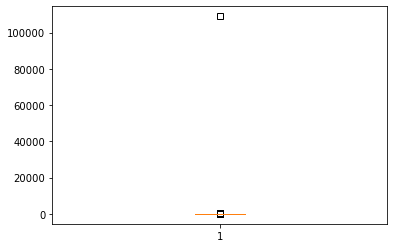

In [102]:
#绘制箱线图
y=df.loc[:,"price"]

plt.boxplot(y,sym='s')

In [103]:
#剔除异常值，再次绘制箱线图
df = df.drop(index=22115,axis=0)
y=df.loc[:,"price"]

plt.boxplot(y,sym='s')

{'whiskers': [<matplotlib.lines.Line2D at 0x27641edcac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2765a3572e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2769ec12ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x276554e9c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2769eca5880>],
 'means': []}

In [7]:
#还是有很多异常值，但总数依然很少(375+614)，所以选择一并删去
# drop_index = y[y > (y.mean()+3*y.std())].index
# df = df.drop(index=drop_index,axis=0)

# y=df.loc[:,"price"]
# #绘制箱线图
# plt.boxplot(y,sym='s')

## 2、特殊字符的切分

In [104]:
# 拆1：feature11

# 1+2        19080
# 1           6428
# 3+2         3298
# 1+2,4+2      731
# 5              1
# 1,3+2          1
# 空值

df.loc[df['feature11']=='1+2', 'feature11'] = '1'
df.loc[df['feature11']=='1', 'feature11'] = '2'
df.loc[df['feature11']=='3+2', 'feature11'] = '3'
df.loc[df['feature11']=='1+2,4+2', 'feature11'] = '4'
df.loc[df['feature11']=='5', 'feature11'] = '5'
df.loc[df['feature11']=='1,3+2', 'feature11'] = '6'

df['feature11'] = df['feature11'].astype(object)


# 拆2：feature12

str_slice = pd.Series(df["feature12"]) 
info = [s for s in str_slice.str.split()]
length = []
width = []
height = []
volume = []

for i in info:
    sub_info = i[0].split('*')
    length.append(int(sub_info[0]))
    width.append(int(sub_info[1]))
    height.append(int(sub_info[2]))
    volume.append(int(sub_info[0])*int(sub_info[1])*int(sub_info[2]))
    
df.insert(df.shape[1], 'feature12-length', length)
df.insert(df.shape[1], 'feature12-width', width)
df.insert(df.shape[1], 'feature12-height', height)
df.insert(df.shape[1], 'feature12-volume', volume)

df['feature12-length'] = df['feature12-length'].astype('float64')
df['feature12-width'] = df['feature12-width'].astype('float64')
df['feature12-height'] = df['feature12-height'].astype('float64')
df['feature12-volume'] = df['feature12-volume'].astype('float64')

# 删除原列
df=df.drop(df[["feature12"]], axis=1)


df.head()

carid  tradeTime brand serial model mileage color cityId carCode  \
0     1  2021/6/28     1      1     1    4.01     1      1       1   
1     2  2021/6/25     2      2     2     8.6     1      2       1   
2     5  2021/6/19     5      5     5   15.56     1      2       3   
3     6  2021/6/29     6      6     6    6.04     1      3       1   
4     7  2021/6/30     7      7     7     5.7     4      1       2   

   transferCount  seatings registerDate licenseDate country maketype  \
0            0.0       5.0    2017/12/1   2018/1/26  779413        1   
1            0.0       5.0    2016/12/1   2017/3/21  779415        2   
2            0.0       5.0     2008/2/1   2008/2/27     NaN      NaN   
3            3.0       5.0     2016/8/1    2016/9/9  779413        1   
4            2.0       5.0     2012/8/1   2012/8/28  779415        2   

  modelyear  displacement gearbox oiltype  newprice feature1 feature2  \
0      2017           1.5       1       1      6.88        1        1   
1      2017           1.2       2       1     11.98        1        2   
2      2008           1.6       4       1     12.78        1        2   
3      2016           1.3       2       1      9.49        1        5   
4      2012           2.0       5       1     18.08        1        5   

  feature3 feature5 feature6 feature8 feature9 feature10 feature11 feature13  \
0        1        1        1        1        5         2         2    201709   
1        2        2        2        2        4         3         2    201609   
2        2        5        2      NaN      NaN       NaN       NaN       NaN   
3        2        6        1        2        5         2         2    201608   
4        2        7        1        1        5         2         2    201204   

  feature14  price  feature12-length  feature12-width  feature12-height  \
0         1   4.24            4220.0           1740.0            1625.0   
1         2   7.38            4630.0           1775.0            1480.0   
2         2   1.00            4515.0           1725.0            1445.0   
3         2   4.38            4500.0           1834.0            1707.0   
4         1   5.90            4315.0           1783.0            1606.0   

   feature12-volume  
0      1.193205e+10  
1      1.216301e+10  
2      1.125420e+10  
3      1.408787e+10  
4      1.235599e+10

## 3、计算时间跨度

In [105]:
#将字符串转为日期类型,分别记为变量tradeTime、
tradeTime = pd.to_datetime(df['tradeTime'])
registerDate = pd.to_datetime(df['registerDate'])
licenseDate = pd.to_datetime(df['licenseDate'])

#计算registerDate-tradeTime，licenseDate-tradeTime
delta_reg = tradeTime-registerDate
delta_lic = tradeTime-licenseDate

#以月为单位表示时间差
delta_weeks_reg = []
for delta in delta_reg:
    if delta.days % 7 <= 3:
        weeks = delta.days//7
    else:
        weeks = delta.days//7 + 1
    delta_weeks_reg.append(weeks)
delta_weeks_lic = []
for delta in delta_lic:
    if delta.days % 7 <= 3:
        weeks = delta.days//7
    else:
        weeks = delta.days//7 + 1
    delta_weeks_lic.append(weeks)
    

#转为datetime类型
feature13 = pd.to_datetime(df['feature13'],format='%Y%m')
modelyear = pd.to_datetime(df['modelyear'])

#计算traedeTime-modelyear，以年为单位
trade_model = []
for i in modelyear.index:
    trade_model.append(tradeTime[i].year-modelyear[i].year)
    
#计算tradeTime-feature13,以月为单位
trade_f13 = []
for i in feature13.index:
    trade_f13.append(tradeTime[i].year*12+tradeTime[i].month-feature13[i].year*12-feature13[i].month)
    
# #加入
df.insert(df.shape[1],'tradeTime-registerDate',delta_weeks_reg)
df.insert(df.shape[1],'tradeTime-licenseDate',delta_weeks_lic)
df.insert(df.shape[1],'tradeTime-modelyear',trade_model)
df.insert(df.shape[1],'tradeTime-feature13',trade_f13)
#删除原列
df = df.drop(df[["tradeTime","registerDate","licenseDate","feature13","modelyear"]],axis=1)
df.head()
# 修改数据类型
df["tradeTime-registerDate"] = df["tradeTime-registerDate"].astype('float64')
df["tradeTime-licenseDate"] = df["tradeTime-licenseDate"].astype('float64')

In [106]:
# 删除car_id列
df = df.drop(df[["carid"]],axis=1)

In [107]:
df

brand serial model mileage color cityId carCode  transferCount  \
0         1      1     1    4.01     1      1       1            0.0   
1         2      2     2     8.6     1      2       1            0.0   
2         5      5     5   15.56     1      2       3            0.0   
3         6      6     6    6.04     1      3       1            3.0   
4         7      7     7     5.7     4      1       2            2.0   
...     ...    ...   ...     ...   ...    ...     ...            ...   
29995    34    588  4169   10.38     5     35       3            0.0   
29996    12     92  1797   11.69     2      1       2            2.0   
29997     7    113   501    9.87     6      1       2            0.0   
29998    45    131  3024    9.57     1      1       1            1.0   
29999    55    229  5838    3.92     1     13       1            0.0   

       seatings country maketype  displacement gearbox oiltype  newprice  \
0           5.0  779413        1           1.5       1       1      6.88   
1           5.0  779415        2           1.2       2       1     11.98   
2           5.0     NaN      NaN           1.6       4       1     12.78   
3           5.0  779413        1           1.3       2       1      9.49   
4           5.0  779415        2           2.0       5       1     18.08   
...         ...     ...      ...           ...     ...     ...       ...   
29995       5.0  779413        1           1.8       6       1     11.86   
29996       5.0  779415        2           2.0      22       1     20.28   
29997       5.0  779415        2           1.6       4       1     14.58   
29998       5.0  779415        3           2.5      25       2     35.40   
29999       5.0     NaN      NaN           2.0      15       1     26.48   

      feature1 feature2 feature3 feature5 feature6 feature8 feature9  \
0            1        1        1        1        1        1        5   
1            1        2        2        2        2        2        4   
2            1        2        2        5        2      NaN      NaN   
3            1        5        2        6        1        2        5   
4            1        5        2        7        1        1        5   
...        ...      ...      ...      ...      ...      ...      ...   
29995        1       14        2       36        6        1        5   
29996        1        6        2       16        2        1        4   
29997        1        2        2        7        2        1        4   
29998        1        8        2       47        2        1        4   
29999        1        6        2       70        2      NaN      NaN   

      feature10 feature11 feature14  price  feature12-length  feature12-width  \
0             2         2         1   4.24            4220.0           1740.0   
1             3         2         2   7.38            4630.0           1775.0   
2           NaN       NaN         2   1.00            4515.0           1725.0   
3             2         2         2   4.38            4500.0           1834.0   
4             2         2         1   5.90            4315.0           1783.0   
...         ...       ...       ...    ...               ...              ...   
29995         2         2         1   0.88            4295.0           1705.0   
29996         3         2         2   8.30            4960.0           1845.0   
29997         3         2         2   5.00            4665.0           1700.0   
29998         3         3         1  28.00            4915.0           1820.0   
29999       NaN         2         2  18.80            4867.0           1823.0   

       feature12-height  feature12-volume  tradeTime-registerDate  \
0                1625.0      1.193205e+10                   186.0   
1                1480.0      1.216301e+10                   238.0   
2                1445.0      1.125420e+10                   698.0   
3                1707.0      1.408787e+10                   256.0   
4                1606.0      1.235599e+10    

## 4.划分训练集和测试集

In [108]:
#删除gearbox缺失数据：只有一条

df = df.dropna(subset=["gearbox"],axis=0)

#price插到最后
price = df['price']
df.drop(labels=['price'], axis=1,inplace=True)
df.insert(33, 'price', price)

#划分训练集和测试集
from sklearn.model_selection import  train_test_split

lst = [i for i in range(0,33)]

X=df.iloc[:,lst]
y=df.loc[:,"price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (20998, 33)
X_test.shape: (9000, 33)
y_train.shape: (20998,)
y_test.shape: (9000,)


## 5、随机森林填充缺失值

In [109]:
# 缺失变量：
null_lst1 = ['carCode','country', 'maketype', 'feature1', 'feature8', 'feature9', 'feature10','feature11']
null_lst2 = [ 'tradeTime-modelyear','tradeTime-feature13']


# 用随机森林分类树填充缺失值

from sklearn.ensemble import RandomForestClassifier
def set_missing_classier_train(df, feature):
    df = df[['brand','serial','model','gearbox',
        'mileage','color','cityId','transferCount',
        'seatings','displacement','oiltype','newprice',
        'feature2','feature3', 'feature5','feature6', 
        'feature14','tradeTime-registerDate','tradeTime-licenseDate',
        'feature12-length','feature12-width','feature12-height','feature12-volume', feature]]
    
    known = df[df[feature].notnull()].values
    unknown = df[df[feature].isnull()].values
    
    y = known[:,-1]
    X = known[:,:-1]
    
    rfc = RandomForestClassifier(random_state=0,n_estimators=100,n_jobs=-1)
    
    rfc.fit(X,y)
    
    predict = rfc.predict(unknown[:,:-1])
    
    df.loc[(df[feature].isnull()),feature] = predict
    
    #return rfr是为后续预测训练集feature缺失数据
    return df,rfc

from sklearn.ensemble import RandomForestClassifier
def set_missing_classier_test(rfc, df, feature):
    df = df[['brand','serial','model','gearbox',
        'mileage','color','cityId','transferCount',
        'seatings','displacement','oiltype','newprice',
        'feature2','feature3', 'feature5','feature6', 
        'feature14','tradeTime-registerDate','tradeTime-licenseDate',
        'feature12-length','feature12-width','feature12-height','feature12-volume', feature]]
    
    known = df[df[feature].notnull()].values
    unknown = df[df[feature].isnull()].values
    
    y = known[:,-1]
    X = known[:,:-1]

#     rfc.fit(X,y)
    
    predict = rfc.predict(unknown[:,:-1])
    
    df.loc[(df[feature].isnull()),feature] = predict
    
    #return rfr是为后续预测训练集feature缺失数据
    return df

In [110]:
rfc_lst = []
for i in null_lst1:
    train_result, rfc = set_missing_classier_train(X_train, i)
    test_result = set_missing_classier_test(rfc, X_test, i)
    X_train[i] = train_result[i]
    X_test[i] = test_result[i]
    rfc_lst.append(rfc)
#     print(i+"已完成！")

In [111]:
# 用随机森林回归树填充缺失值

from sklearn.ensemble import RandomForestRegressor
def set_missing_regress_train(df, feature):
    df = df[['brand','serial','model','gearbox',
        'mileage','color','cityId','transferCount',
        'seatings','displacement','oiltype','newprice',
        'feature2','feature3', 'feature5','feature6', 
        'feature14','tradeTime-registerDate','tradeTime-licenseDate',
        'feature12-length','feature12-width','feature12-height','feature12-volume', feature]]
    
    known = df[df[feature].notnull()].values
    unknown = df[df[feature].isnull()].values
    
    y = known[:,-1]
    X = known[:,:-1]

    rfr = RandomForestRegressor(random_state=0,n_estimators=100,n_jobs=-1)
    
    rfr.fit(X,y)
    
    predict = rfr.predict(unknown[:,:-1])
    
    df.loc[(df[feature].isnull()),feature] = predict
    
    #return rfr是为后续预测训练集feature缺失数据
    return df,rfr


# 用随机森林回归树填充缺失值

from sklearn.ensemble import RandomForestRegressor
def set_missing_regress_test(rfr, df, feature):
    df = df[['brand','serial','model','gearbox',
        'mileage','color','cityId','transferCount',
        'seatings','displacement','oiltype','newprice',
        'feature2','feature3', 'feature5','feature6', 
        'feature14','tradeTime-registerDate','tradeTime-licenseDate',
        'feature12-length','feature12-width','feature12-height','feature12-volume', feature]]
    
    known = df[df[feature].notnull()].values
    unknown = df[df[feature].isnull()].values
    
    y = known[:,-1]
    X = known[:,:-1]

#     rfr.fit(X,y)
    
    predict = rfr.predict(unknown[:,:-1])
    
    df.loc[(df[feature].isnull()),feature] = predict
    
    #return rfr是为后续预测训练集feature缺失数据
    return df

In [112]:
rfr_lst = []
for i in null_lst2:
    train_result, rfr = set_missing_regress_train(X_train, i)
    test_result = set_missing_regress_test(rfr, X_test, i)
    X_train[i] = train_result[i]
    X_test[i] = test_result[i]
    rfr_lst.append(rfr)
#     print(i+"已完成！")

## 6、CountEncoder

In [18]:
# dic = X_train['serial'].astype('int64').value_counts()
# X_train.loc[100,'serial'] in dic
# dic.sort_index()
# dics = dic.append(X_test.loc[X_test['serial']==1,'serial'].astype('int64').value_counts()).sort_index()
# dics

In [113]:
# # 经观察，不同类别数据的分布并不均匀，因此尝试提取frequency作为非数值型变量的表示
# # 对于brand、serial、model：brand用每个品牌占总数的频率，serial用每个serial占该brand所有汽车的占比，model用每个model占该serial的占比
# 下面的brands、serials、models这三个变量可以作为固定的数据使用
serials = X_train['serial'].value_counts()
brands = X_train['brand'].value_counts()
models = X_train['model'].value_counts()
#对训练集：
X_train_1 = X_train.copy()
#转变数据类型
X_train_1['serial'] = X_train_1['serial']
X_train_1['model'] = X_train_1['model']
X_train_1['brand'] = X_train_1['brand']
for i in X_train_1.index:
    modeli = X_train_1.loc[i,'model']
    seriali = X_train_1.loc[i,'serial']
    brandi = X_train_1.loc[i,'brand']
    X_train_1.loc[i,'model'] = models[modeli]/serials[seriali]
    X_train_1.loc[i,'serial'] = serials[seriali]/brands[brandi]
    
#对测试集：
X_test_1 = X_test.copy()
#转变数据类型
X_test_1['serial'] = X_test_1['serial']
X_test_1['model'] = X_test_1['model']
X_test_1['brand'] = X_test_1['brand']
for i in X_test_1.index:
    modeli = X_test_1.loc[i,'model']
    seriali = X_test_1.loc[i,'serial']
    brandi = X_test_1.loc[i,'brand']
    #处理未知值
    if modeli not in models:
        models = models.append(X_test_1.loc[X_test_1['model']==modeli,'model'].value_counts())
    if seriali not in serials:
        serials = serials.append(X_test_1.loc[X_test_1['serial']==seriali,'serial'].value_counts())
    if brandi not in brands:
        brands = brands.append(X_test_1.loc[X_test_1['brand']==brandi,'brand'].value_counts())
    X_test_1.loc[i,'model'] = models[modeli]/serials[seriali]
    X_test_1.loc[i,'serial'] = serials[seriali]/brands[brandi]
    
#frequency编码：首先安装编码库pip install category-encoders
from category_encoders import CountEncoder
#选出其他非数值列
notnum_columns = ['brand','color','cityId','carCode','country',
                           'maketype','gearbox','oiltype','feature1','feature2','feature3','feature5',
                          'feature6','feature8','feature9','feature10','feature11','feature14']
#定义编码器：传入要编码的列
count_encoder = CountEncoder(cols=notnum_columns).fit(X_train_1)
#分别对测试集和训练集编码：无需再合并到数据集或删除列了
X_train_code = count_encoder.transform(X_train_1)
X_test_code = count_encoder.transform(X_test_1)

X_train_code.head(3)

brand    serial     model mileage  color  cityId  carCode  \
17925    143  0.132867  0.105263    9.61   8552    8829    11242   
5143     438  0.189498  0.722892    8.16   8552    1604    11242   
850     1015  0.295567      0.05    7.77   2694    1017     7927   

       transferCount  seatings  country  maketype  displacement  gearbox  \
17925            1.0       5.0      693      4021           3.0     2213   
5143             0.0       5.0     2794      2908           2.0      618   
850              1.0       7.0     2935     14069           2.4     5462   

       oiltype  newprice  feature1  feature2  feature3  feature5  feature6  \
17925    20312     89.80     20961       350     20623        89     10147   
5143       615     27.98     20961      2074     20623       438      6242   
850      20312     22.80     20961       480     20623      1004      1061   

       feature8  feature9  feature10  feature11  feature14  feature12-length  \
17925       342     10405      10517       2316      12734            5265.0   
5143      10075      9901      10479       2316      12734            4815.0   
850       10209      9901      10479      18163      12734            5213.0   

       feature12-width  feature12-height  feature12-volume  \
17925           1899.0            1460.0      1.459742e+10   
5143            1855.0            1720.0      1.536274e+10   
850             1847.0            1750.0      1.684972e+10   

       tradeTime-registerDate  tradeTime-licenseDate  tradeTime-modelyear  \
17925                   275.0                  255.0                  5.0   
5143                    256.0                  250.0                  5.0   
850                     350.0                  340.0                  7.0   

       tradeTime-feature13  
17925                 66.0  
5143                  62.0  
850                   91.0

In [20]:
X_test_code['serial'].describe()

count     9000.00000
unique     562.00000
top          0.25509
freq       186.00000
Name: serial, dtype: float64

## 7、低方差滤波

In [28]:
#都不算小
X_train_code.var()

brand                     6.782296e+05
serial                    2.054917e-02
model                     3.303133e-02
color                     9.014571e+06
cityId                    1.357488e+07
carCode                   7.834175e+06
transferCount             6.169963e-01
seatings                  4.131328e-01
country                   6.141106e+06
maketype                  2.518370e+07
displacement              2.552094e-01
gearbox                   3.975759e+06
oiltype                   1.109026e+07
newprice                  3.694616e+02
feature1                  8.242087e+05
feature2                  3.351750e+06
feature3                  6.831271e+06
feature5                  1.726761e+05
feature6                  1.153029e+07
feature8                  1.781181e+06
feature9                  2.916116e+06
feature10                 2.107634e+04
feature11                 2.693435e+07
feature14                 5.305536e+06
feature12-length          1.002094e+05
feature12-width          

## 8、特征选择

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
scores = []
n_estimators = [20,50,100,200,300,400,500]

for n in n_estimators:
    forest = RandomForestRegressor(n_estimators=n, random_state=0, n_jobs=-1)
    score = cross_val_score(forest,X_train,y_train,cv=5)
    scores.append(score)
    
plt.plot(scores)
plt.title('Cross Validation scores')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(n_estimators)

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

importance_list = []
forest = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = X_train.columns[:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    
importance_list.append(importances)

 1) newprice                       0.660071
 2) tradeTime-licenseDate          0.109600
 3) tradeTime-registerDate         0.068224
 4) mileage                        0.021858
 5) tradeTime-feature13            0.014752
 6) feature12-height               0.013578
 7) feature12-length               0.013028
 8) cityId                         0.012062
 9) tradeTime-modelyear            0.011172
10) serial                         0.009333
11) brand                          0.008434
12) displacement                   0.008209
13) model                          0.007697
14) gearbox                        0.007303
15) feature12-width                0.005545
16) feature12-volume               0.005387
17) feature2                       0.003773
18) color                          0.003243
19) country                        0.002871
20) feature5                       0.002640
21) feature8                       0.002410
22) feature6                       0.001456
23) feature10                   

## 9、因子分析

In [114]:
# 归一化处理：选择性运行这一个代码块，如果前面已经归一化过了，就不需要在运行一遍了
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(X_train_code)
X_train_sc = min_max_scaler.transform(X_train_code)
X_test_sc = min_max_scaler.transform(X_test_code)

In [68]:
#充分性检验：确认是否可以做因子分析
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(X_train_sc)
print('巴特利特值：',p_value,'小于0.1，则可以选择这种方法')
kmo_all, kmo_model = calculate_kmo(X_train_sc)
print("kmo值：",kmo_model,'大于0.6，则可以选择这种方法')
#选择合适的维数
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(X_train_code.shape[1]+1, rotation=None)
fa.fit(X_train_code)
ev, v = fa.get_eigenvalues() # 计算特征值和特征向量
var = fa.get_factor_variance()#给出方差贡献率
#绘图展示
fig,axes = plt.subplots(1,2,figsize=(14,9))
axes[0].plot(ev,'ob-')
axes[0].set_title('eigenValue')
axes[1].plot(var[2],'ob-')
axes[1].set_title('Cumlative Varience')

plt.show()

巴特利特值： 0.0 小于0.1，则可以选择这种方法
kmo值： 0.7140907291081602 大于0.6，则可以选择这种方法


In [116]:
#根据上述结果，选择降到9维
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=9,rotation='varimax')
fa.fit(X_train_sc)
X_train_fa = fa.transform(X_train_sc)
X_test_fa = fa.transform(X_test_sc)

#可视化展示因子变换的矩阵，如果不需要，可以注释掉
#图中X轴1-9是9个因子，图中数字是做变换的矩阵的数字
import seaborn as sns
df_cm = pd.DataFrame(np.abs(fa.loadings_),index=X_train_code.columns)

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_cm,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Variable")

Text(87.0, 0.5, 'Variable')

In [117]:
X_test_fa

array([[-1.16125835, -0.2387877 ,  0.42245935, ...,  0.83800859,
         0.18680184,  0.35607058],
       [ 0.0920934 , -0.1593256 , -1.26016643, ..., -0.07987245,
        -0.45839104,  0.50752704],
       [-0.14136017, -0.7691718 , -1.10177668, ..., -0.77736423,
        -0.29941725, -1.33716554],
       ...,
       [-0.53892907, -0.35808333, -1.30358966, ..., -0.80048576,
        -0.4567283 ,  1.06641753],
       [ 0.41586732, -0.96677666,  1.6979112 , ...,  0.89048199,
         0.85417216,  0.29726944],
       [-1.32283744,  0.34892085,  1.03973363, ..., -1.80134229,
        -0.66782135, -0.61858242]])

## 10、PCA选择

In [96]:
# 归一化处理：选择性运行这一个代码块，如果前面已经归一化过了，就不需要在运行一遍了

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(X_train_code)
X_train_sc = min_max_scaler.transform(X_train_code)
X_test_sc = min_max_scaler.transform(X_test_code)

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components='mle').fit(X_train_sc)
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

pd.DataFrame(X_test_pca).describe()

0            1            2            3            4   \
count  8703.000000  8703.000000  8703.000000  8703.000000  8703.000000   
mean      0.007832     0.003355     0.005777    -0.007369    -0.005236   
std       0.609542     0.477099     0.430081     0.415874     0.360639   
min      -1.057266    -1.180750    -1.056365    -1.149321    -0.941597   
25%      -0.502716    -0.360723    -0.313888    -0.336205    -0.260691   
50%      -0.058208    -0.023135    -0.048347    -0.031004    -0.025228   
75%       0.499181     0.358884     0.289283     0.260544     0.223115   
max       1.459732     1.483252     1.504057     1.197508     1.297760   

                5            6            7            8            9   \
count  8703.000000  8703.000000  8703.000000  8703.000000  8703.000000   
mean      0.000798     0.001869     0.005179     0.002169     0.001199   
std       0.331424     0.334734     0.311867     0.240112     0.210360   
min      -1.200683    -1.054924    -1.053223    -0.375202    -0.734806   
25%      -0.177533    -0.238256    -0.210275    -0.123358    -0.127191   
50%       0.031439     0.007192     0.015323    -0.055387    -0.044065   
75%       0.205566     0.231069     0.220445     0.026816     0.107137   
max       1.064606     1.321774     1.050297     0.965123     1.085374   

                10           11           12           13           14  \
count  8703.000000  8703.000000  8703.000000  8703.000000  8703.000000   
mean      0.005491    -0.000195    -0.004306     0.001115     0.002693   
std       0.185990     0.186783     0.169104     0.164880     0.151894   
min      -0.861904    -0.986706    -0.731103    -0.796713    -0.693992   
25%      -0.127623    -0.105291    -0.089418    -0.079558    -0.077268   
50%      -0.058019    -0.018509    -0.008383    -0.011273    -0.011930   
75%       0.184665     0.086509     0.063236     0.054302     0.061182   
max       0.853452     1.464766     0.970448     1.092515     1.101066   

                15           16           17           18           19  \
count  8703.000000  8703.000000  8703.000000  8703.000000  8703.000000   
mean     -0.001558     0.002257    -0.001385     0.001206    -0.002070   
std       0.142851     0.139000     0.124165     0.117207     0.098902   
min      -0.572124    -0.087355    -0.357855    -0.725165    -0.445224   
25%      -0.097714    -0.027276    -0.068828    -0.044416    -0.068050   
50%      -0.009945    -0.016638    -0.005892     0.007059    -0.002153   
75%       0.085766    -0.006361     0.050292     0.057720     0.055397   
max       0.975522     1.016195     1.010770     0.609738     0.539144   

                20           21           22           23           24  \
count  8703.000000  8703.000000  8703.000000  8703.000000  8703.000000   
mean      0.000320    -0.000615    -0.000619     0.000110    -0.001208   
std       0.077592     0.069621     0.064114     0.058729     0.053760   
min      -0.192920    -0.408042    -0.376321    -0.369538    -0.434650   
25%      -0.048718    -0.028877    -0.039204    -0.035777    -0.028070   
50%      -0.021591     0.005247    -0.005069    -0.003606     0.000095   
75%       0.042122     0.035474     0.033023     0.037400     0.028266   
max       0.756031     0.548855     0.557032     0.283587     0.457799   

                25           26           27           28           29  \
count  8703.000000  8703.000000  8703.000000  8703.000000  8703.000000   
mean      0.000142     0.000185    -0.000021    -0.000410     0.000351   
std       0.045275     0.042755     0.036338     0.031730     0.025039   
min      -0.176351    -0.395235    -0.235531    -0.141620    -0.112820   
25%      -0.021299    -0.022499    -0.019403    -0.018282    -0.014768   
50%      -0.002643     0.004730    -0.000630    -0.000608    -0.001339   
75%       0.017337     0.026919     0.017255     0.016057     0.012159   
max       0.843347     0.336177     0.395674     0.432232     0.236573   

              

# 机器学习模型

In [21]:
# 归一化处理：选择性运行这一个代码块，如果前面已经归一化过了，就不需要在运行一遍了

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(X_train_code)
X_train_sc = min_max_scaler.transform(X_train_code)
X_test_sc = min_max_scaler.transform(X_test_code)

In [22]:
pd.DataFrame(X_test_sc).describe()

0            1            2            3            4   \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      0.408043     0.148699     0.134713     0.160371     0.593399   
std       0.307862     0.145680     0.215981     0.098440     0.358066   
min      -0.000372     0.000000     0.000000     0.000000     0.000000   
25%       0.103166     0.051371     0.023514     0.087637     0.218366   
50%       0.401490     0.108485     0.061289     0.146546     0.488669   
75%       0.621601     0.211896     0.151855     0.214621     1.000000   
max       1.000000     1.000000     4.007059     0.833669     1.000000   

                5            6            7            8            9   \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      0.489054     0.805639     0.057481     0.442984     0.619440   
std       0.440065     0.263285     0.089641     0.095129     0.334935   
min      -0.000114    -0.002669     0.000000     0.000000     0.000000   
25%       0.107500     0.695339     0.000000     0.428571     0.349444   
50%       0.224659     1.000000     0.000000     0.428571     0.577420   
75%       1.000000     1.000000     0.111111     0.428571     1.000000   
max       1.000000     1.000000     1.111111     1.000000     1.000000   

                10           11           12           13           14  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      0.683377     0.212055     0.403445     0.969389     0.041398   
std       0.447232     0.095138     0.361774     0.169906     0.044121   
min       0.000000     0.000000     0.000183     0.000098     0.000944   
25%       0.092269     0.154472     0.117636     1.000000     0.017350   
50%       1.000000     0.219512     0.293085     1.000000     0.030025   
75%       1.000000     0.219512     1.000000     1.000000     0.050006   
max       1.000000     0.967480     1.000000     1.000000     0.817371   

                15           16           17           18           19  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      0.997778     0.574546     0.981203     0.472454     0.702594   
std       0.047091     0.334563     0.135482     0.315858     0.335881   
min       0.000000     0.000000     0.000097    -0.000762     0.001483   
25%       1.000000     0.322498     1.000000     0.188880     0.613621   
50%       1.000000     0.483017     1.000000     0.427266     0.613621   
75%       1.000000     1.000000     1.000000     0.814928     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                20           21           22           23           24  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      0.956785     0.945142     0.998538     0.878541     0.855681   
std       0.184678     0.171267     0.001475     0.306183     0.181157   
min       0.000000     0.000000     0.997050     0.027981     0.000000   
25%       0.986966     0.951652     0.997050     1.000000     0.641141   
50%       0.986966     1.000000     1.000000     1.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                25           26           27           28           29  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      0.606920     0.469817     0.262855     0.264045     0.328000   
std       0.101991     0.097340     0.080578     0.075726     0.180294   
min       0.000000     0.000000     0.018308     0.000000     0.001120   
25%       0.561431     0.417504     0.205650     0.216978     0.182531   
50%       0.609642     0.469154     0.223485     0.255668     0.302352   
75%       0.671851     0.522238     0.332702     0.301156     0.450168   
max       1.000000     1.000000     1.000000     1.000000     0.922732   

              

## 1、线性回归

In [118]:
# 损失函数：MSE
def mse_loss(y_pred, y_test):
    y_pred = list(y_pred)
    y_test = list(y_test)
    
    mse = 0
    for i in range(len(y_pred)):
        mse += (y_pred[i]-y_test[i])**2
    mse /= len(y_pred)
    
    return mse


# 损失函数：Accuracy = count(Ape 0.05) / count(total)
def accuracy(y_pred, y_test):
    y_pred = list(y_pred)
    y_test = list(y_test)
    
    ape = 0
    count = 0
    for i in range(len(y_pred)):
        ape += abs(y_pred[i]-y_test[i])/y_test[i]
        if ape<=0.05:
            count += 1
            
    mape = ape/len(y_pred)
    accuracy =  count/len(y_pred)
    score = 0.2*(1-mape)+0.8*accuracy
    return mape, accuracy, score

In [106]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lireg = linear_model.LinearRegression()
lireg.fit(X_train_sc, y_train)

# 验证集
loss1 = -cross_val_score(lireg, X_train_sc, y_train, cv = 10, scoring='neg_mean_squared_error').mean()

# 训练集
y_pred = lireg.predict(X_test_sc)
mse1 = mse_loss(y_pred, y_test)
mape1, accuracy1, score1 = accuracy(y_pred, y_test)

print("线性回归:countEncoder")
print("训练集mse:", loss1)
print("测试集mse:", mse1)
print("测试集mape:", mape1)
print("测试集accur:", accuracy1)
print("测试集score:",score1)

线性回归:countEncoder
训练集mse: 16.321902882953673
测试集mse: 17.198400449765572
测试集mape: 0.4153283109907366
测试集accur: 0.0
测试集score: 0.11693433780185268


In [119]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lireg = linear_model.LinearRegression()
lireg.fit(X_train_fa, y_train)

# 验证集
loss1 = -cross_val_score(lireg, X_train_fa, y_train, cv = 10, scoring='neg_mean_squared_error').mean()

# 训练集
y_pred = lireg.predict(X_test_fa)
mse1 = mse_loss(y_pred, y_test)
mape1, accuracy1, score1 = accuracy(y_pred, y_test)

print("线性回归:因子分析")
print("训练集mse:", loss1)
print("测试集mse:", mse1)
print("测试集mape:", mape1)
print("测试集accur:", accuracy1)
print("测试集score:",score1)

线性回归:因子分析
训练集mse: 97.21180067958802
测试集mse: 62.228508208737864
测试集mape: 0.5652591243628985
测试集accur: 0.0
测试集score: 0.08694817512742031


## 2、回归树

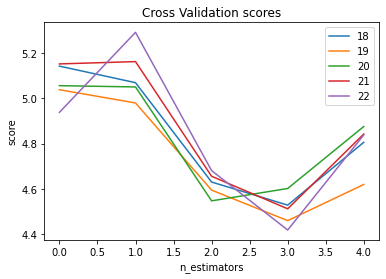

In [107]:
#交叉验证
from sklearn import tree
from sklearn.model_selection import cross_val_score

scores = []
max_depths = [18,19,20,21,22]

for n in max_depths:
    clf = tree.DecisionTreeRegressor(max_depth=n,random_state=0)
    score = -cross_val_score(clf,X_train_sc,y_train,cv=5,scoring='neg_mean_squared_error')
    scores.append(score)
    
for i in scores:
    plt.plot(i)
plt.title('Cross Validation scores')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(max_depths)

plt.show()

In [109]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=20,random_state=0)
clf = clf.fit(X_train_sc, y_train)

# 验证集
loss3 = -cross_val_score(clf, X_train_sc, y_train, cv = 10, scoring='neg_mean_squared_error').mean()

# 训练集
clf = clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
mse3 = mse_loss(y_pred, y_test)
mape3, accuracy3, score3 = accuracy(y_pred, y_test)

print("回归树:Countencoder")
print("训练集mse:", loss3)
print("测试集mse:", mse3)
print("测试集mape:", mape3)
print("测试集accur:", accuracy3)
print("测试集score:",score3)

回归树:Countencoder
训练集mse: 4.621376071752553
测试集mse: 4.718237236662554
测试集mape: 0.17539879466788205
测试集accur: 0.0
测试集score: 0.16492024106642358


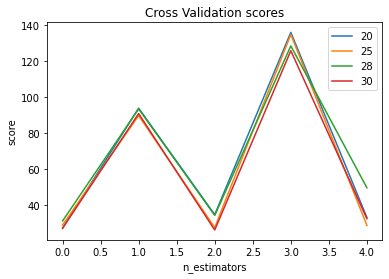

In [124]:
# #交叉验证
from sklearn import tree
from sklearn.model_selection import cross_val_score

scores = []
max_depths = [20,25,28,30]

for n in max_depths:
    clf = tree.DecisionTreeRegressor(max_depth=n,random_state=0)
    score = -cross_val_score(clf,X_train_fa,y_train,cv=5,scoring='neg_mean_squared_error')
    scores.append(score)
    
for i in scores:
    plt.plot(i)
plt.title('Cross Validation scores')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(max_depths)

plt.show()

In [125]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=25,random_state=0)
clf = clf.fit(X_train_fa, y_train)

# 验证集
loss3 = -cross_val_score(clf, X_train_fa, y_train, cv = 10, scoring='neg_mean_squared_error').mean()

# 训练集
clf = clf.fit(X_train_fa, y_train)
y_pred = clf.predict(X_test_fa)
mse3 = mse_loss(y_pred, y_test)
mape3, accuracy3, score3 = accuracy(y_pred, y_test)

print("回归树:Countencoder")
print("训练集mse:", loss3)
print("测试集mse:", mse3)
print("测试集mape:", mape3)
print("测试集accur:", accuracy3)
print("测试集score:",score3)

回归树:Countencoder
训练集mse: 69.39768115705638
测试集mse: 44.08167012460929
测试集mape: 0.16309538531612636
测试集accur: 0.00011111111111111112
测试集score: 0.16746981182566364


## 3、随机森林

[array([3.02320341, 3.10733981, 3.29687797, 3.01675746, 3.62064446]), array([2.93393709, 3.08167248, 3.25509231, 2.94949014, 3.52596172]), array([2.92893606, 3.06905636, 3.23050709, 2.98045061, 3.44853032]), array([2.91456681, 3.08123575, 3.24113801, 2.96496098, 3.4187903 ]), array([2.90889811, 3.08251815, 3.22907292, 2.96058268, 3.41633982])]


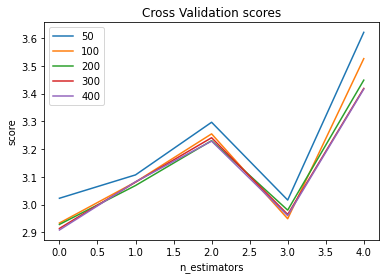

In [92]:
#交叉验证
from sklearn.ensemble import RandomForestRegressor

scores = []
n_estimators = [50,100,200,300,400]

for n in n_estimators:
    forest = RandomForestRegressor(n_estimators=n,random_state=0)
    score = -cross_val_score(forest,X_train_sc,y_train,cv=5,scoring='neg_mean_squared_error')
    scores.append(score)
    
print(scores)    
for i in scores:
    plt.plot(i)
plt.title('Cross Validation scores')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(n_estimators)

plt.show()

In [147]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=800, random_state=0)
rfr.fit(X_train_sc, y_train)

# 验证集
loss4 = -cross_val_score(rfr, X_train_sc, y_train, cv = 10, scoring='neg_mean_squared_error').mean()

# 训练集
y_pred = rfr.predict(X_test_sc)
mse4 = mse_loss(y_pred, y_test)
mape4, accuracy4, score4 = accuracy(y_pred, y_test)

print("随机森林:CountEncoder")
print("训练集mse:", loss4)
print("测试集mse:", mse4)
print("测试集mape:", mape4)
print("测试集accur:", accuracy4)
print("测试集score:",score4)

随机森林:CountEncoder
训练集mse: 47.9379965945527
测试集mse: 13.493412508101459
测试集mape: 0.1048994804649688
测试集accur: 0.0
测试集score: 0.17902010390700626


In [157]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1200, random_state=0)
rfr.fit(X_train_sc, y_train)

# 验证集
loss4 = -cross_val_score(rfr, X_train_sc, y_train, cv = 10, scoring='neg_mean_squared_error').mean()

# 训练集 
y_pred = rfr.predict(X_test_sc)
mse4 = mse_loss(y_pred, y_test)
mape4, accuracy4, score4 = accuracy(y_pred, y_test)

print("随机森林:CountEncoder")
print("训练集mse:", loss4)
print("测试集mse:", mse4)
print("测试集mape:", mape4)
print("测试集accur:", accuracy4)
print("测试集score:",score4)

随机森林:CountEncoder
训练集mse: 47.90507657698798
测试集mse: 13.117332253842614
测试集mape: 0.10420713465671631
测试集accur: 0.0
测试集score: 0.17915857306865676


[array([ 31.61431817,  68.52707569,  19.04712226, 134.16366558,
        13.64966809]), array([ 32.65576303,  60.66998559,  18.27367217, 141.13244627,
        12.73386743]), array([ 33.28633145,  55.64232772,  16.60533104, 137.53090192,
        13.05827769]), array([ 34.806063  ,  59.78839908,  16.22368475, 132.24954914,
        13.66809102])]


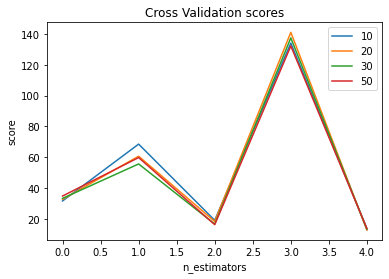

In [127]:
#交叉验证
from sklearn.ensemble import RandomForestRegressor

scores = []
n_estimators = [10,20,30,50]

for n in n_estimators:
    forest = RandomForestRegressor(n_estimators=n,random_state=0)
    score = -cross_val_score(forest,X_train_fa,y_train,cv=5,scoring='neg_mean_squared_error')
    scores.append(score)
    
print(scores)    
for i in scores:
    plt.plot(i)
plt.title('Cross Validation scores')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(n_estimators)

plt.show()

In [128]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=50, random_state=0)
rfr.fit(X_train_fa, y_train)

# 验证集
loss4 = -cross_val_score(rfr, X_train_fa, y_train, cv = 10, scoring='neg_mean_squared_error').mean()

# 训练集
y_pred = rfr.predict(X_test_fa)
mse4 = mse_loss(y_pred, y_test)
mape4, accuracy4, score4 = accuracy(y_pred, y_test)

print("随机森林:因子分析")
print("训练集mse:", loss4)
print("测试集mse:", mse4)
print("测试集mape:", mape4)
print("测试集accur:", accuracy4)
print("测试集score:",score4)

随机森林:因子分析
训练集mse: 55.188662111949405
测试集mse: 15.154080034401051
测试集mape: 0.12710326108545056
测试集accur: 0.0
测试集score: 0.1745793477829099


## 4、神经网络

In [94]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(25,25), activation='relu', random_state=1, max_iter=200)
loss6 = -cross_val_score(nn, X_train_sc, y_train, cv = 10, scoring='neg_mean_squared_error').mean()
nn.fit(X_train_sc, y_train)

# 训练集
y_pred = nn.predict(X_test_sc)
mse6 = mse_loss(y_pred, y_test)
mape6, accuracy6, score6 = accuracy(y_pred, y_test)

print("神经网络:Countencoder")
print("训练集mse:", loss6)
print("测试集mse:", mse6)
print("测试集mape:", mape6)
print("测试集accur:", accuracy6)
print("测试集score:",score6)

神经网络:Countencoder
训练集mse: 5.5854663713624015
测试集mse: 5.962076477630464
测试集mape: 0.23207874011399424
测试集accur: 0.0001149029070435482
测试集score: 0.153676174302836


In [129]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(25,25), activation='relu', random_state=1, max_iter=200)
loss6 = -cross_val_score(nn, X_train_fa, y_train, cv = 10, scoring='neg_mean_squared_error').mean()
nn.fit(X_train_fa, y_train)

# 训练集
y_pred = nn.predict(X_test_fa)
mse6 = mse_loss(y_pred, y_test)
mape6, accuracy6, score6 = accuracy(y_pred, y_test)

print("神经网络:因子分析")
print("训练集mse:", loss6)
print("测试集mse:", mse6)
print("测试集mape:", mape6)
print("测试集accur:", accuracy6)
print("测试集score:",score6)

神经网络:因子分析
训练集mse: 35.699796563614186
测试集mse: 12.366794312125139
测试集mape: 0.1950985501410069
测试集accur: 0.0
测试集score: 0.1609802899717986


## 5、LightGBM

In [131]:
import lightgbm as lgbm
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

def lightgbm(X_train, y_train,X_test):
    lgbm_reg = lgbm.LGBMRegressor(objective='regression')
    lgbm_reg.fit(X_train, y_train)
    
    loss7 = -cross_val_score(lgbm_reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean()

    y_pred = lgbm_reg.predict(X_test)
    mse7 = mse_loss(y_pred, y_test)
    mape7, accuracy7, score7 = accuracy(y_pred, y_test)

    return loss7, mse7, mape7, accuracy7, score7

In [164]:
loss7, mse7, mape7, accuracy7, score7 = lightgbm(X_train_sc,y_train,X_test_sc)
print("LightGBM:Countencoder")
print("训练集mse:", loss7)
print("测试集mse:", mse7)
print("测试集mape:", mape7)
print("测试集accur:", accuracy7)
print("测试集score:",score7)

LightGBM:Countencoder
训练集mse: 2.1856542573035114
测试集mse: 2.39494960792052
测试集mape: 0.14679727231552547
测试集accur: 0.0001149029070435482
测试集score: 0.17073246786252974


In [132]:
loss7, mse7, mape7, accuracy7, score7 = lightgbm(X_train_fa,y_train,X_test_fa)
print("LightGBM:因子分析")
print("训练集mse:", loss7)
print("测试集mse:", mse7)
print("测试集mape:", mape7)
print("测试集accur:", accuracy7)
print("测试集score:",score7)

LightGBM:因子分析
训练集mse: 52.79601855380041
测试集mse: 17.53209141472146
测试集mape: 0.19326885459158474
测试集accur: 0.0
测试集score: 0.16134622908168306


## 6、SVM

In [169]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

def svm_regression(X_train, y_train,X_test):
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)

    # 验证集
    loss5 = -cross_val_score(svr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean()

    # 训练集
    y_pred = svr.predict(X_test)
    mse5 = mse_loss(y_pred, y_test)
    mape5, accuracy5, score5 = accuracy(y_pred, y_test)

    return loss5, mse5, mape5, accuracy5, score5

## 7、stacking

In [133]:
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
#定义stacking类
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    #base_model第一层模型：传入列表；meta_model第二层模型：单个模型
    #n_folds=几折
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    # 将原来的模型clone出来，并且进行实现fit功能
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        #对于每个模型，使用交叉验证的方法来训练初级学习器，并且得到次级训练集
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
#                 self.base_models_[i].append(instance)
                instance = clone(model)
                instance.fit(X.loc[train_index,:], y.loc[train_index,])
                y_pred = instance.predict(X.loc[holdout_index,:])
                out_of_fold_predictions[holdout_index, i] = y_pred.reshape(1,-1)
                self.base_models_[i].append(instance)

        # 使用次级训练集来训练次级学习器
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    #在上面的fit方法当中，已经将我们训练出来的初级学习器和次级学习器保存下来了
    #predict的时候只需要用这些学习器构造我们的次级预测数据集并且进行预测就可以了
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [42]:
#定义模型
#建议第一层选择之前已经训练的效果较好的(因为咱们前面模型也没几个，其实都可以加上)，第二层学习器选择简单的线性回归
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import lightgbm as lgbm

clf2 = tree.DecisionTreeRegressor(max_depth=20,random_state=0)
forest2 = RandomForestRegressor(n_estimators=200,random_state=0)
lightgbm2 = lgbm.LGBMRegressor(objective='regression')
lireg2 = linear_model.LinearRegression()
base_models = [lireg2,clf2,forest2,lightgbm2]
meta_model = linear_model.LinearRegression()

stacking = StackingAveragedModels(base_models=base_models,meta_model=meta_model)

#训练模型
stacking.fit(pd.DataFrame(X_train_sc),pd.DataFrame(y_train.values))

#测试
y_pred = stacking.predict(X_test_sc)
mse8 = mse_loss(y_pred, y_test)
mape8, accuracy8, score8 = accuracy(y_pred, y_test)

print("stacking:Countencoder")
# print("训练集mse:", loss8)
print("测试集mse:", mse8)
print("测试集mape:", mape8)
print("测试集accur:", accuracy8)
print("测试集score:",score8)

stacking:Countencoder
测试集mse: [20.40115125]
测试集mape: [0.11608591]
测试集accur: 0.00011111111111111112
测试集score: [0.17687171]


In [134]:
#建议第一层选择之前已经训练的效果较好的(因为咱们前面模型也没几个，其实都可以加上)，第二层学习器选择简单的线性回归
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import lightgbm as lgbm

clf2 = tree.DecisionTreeRegressor(max_depth=20,random_state=0)
forest2 = RandomForestRegressor(n_estimators=200,random_state=0)
lightgbm2 = lgbm.LGBMRegressor(objective='regression')
lireg2 = linear_model.LinearRegression()
base_models = [lireg2,clf2,forest2,lightgbm2]
meta_model = linear_model.LinearRegression()

stacking = StackingAveragedModels(base_models=base_models,meta_model=meta_model)

#训练模型
stacking.fit(pd.DataFrame(X_train_fa),pd.DataFrame(y_train.values))

#测试
y_pred = stacking.predict(X_test_fa)
mse8 = mse_loss(y_pred, y_test)
mape8, accuracy8, score8 = accuracy(y_pred, y_test)

print("stacking:因子分析")
# print("训练集mse:", loss8)
print("测试集mse:", mse8)
print("测试集mape:", mape8)
print("测试集accur:", accuracy8)
print("测试集score:",score8)

stacking:因子分析
测试集mse: [11.11337951]
测试集mape: [0.14778379]
测试集accur: 0.0
测试集score: [0.17044324]


In [173]:
#定义模型
#建议第一层选择之前已经训练的效果较好的(因为咱们前面模型也没几个，其实都可以加上)，第二层学习器选择简单的线性回归
clf2 = tree.DecisionTreeRegressor(max_depth=20,random_state=0)
forest2 = RandomForestRegressor(n_estimators=200,random_state=0)
lightgbm2 = lgbm.LGBMRegressor(objective='regression')
lireg2 = linear_model.LinearRegression()
svr = SVR(kernel='rbf')
base_models = [lireg2,clf2,forest2,lightgbm2,svr]
meta_model = linear_model.LinearRegression()

stacking = StackingAveragedModels(base_models=base_models,meta_model=meta_model)

#训练模型
stacking.fit(pd.DataFrame(X_train_sc),pd.DataFrame(y_train.values))

#测试
y_pred = stacking.predict(X_test_sc)
mse8 = mse_loss(y_pred, y_test)
mape8, accuracy8, score8 = accuracy(y_pred, y_test)

print("stacking:Countencoder")
# print("训练集mse:", loss8)
print("测试集mse:", mse8)
print("测试集mape:", mape8)
print("测试集accur:", accuracy8)
print("测试集score:",score8)

stacking:Countencoder
测试集mse: [2.27579937]
测试集mape: [0.13934637]
测试集accur: 0.0001149029070435482
测试集score: [0.17222265]


In [170]:
#定义模型
#建议第一层选择之前已经训练的效果较好的(因为咱们前面模型也没几个，其实都可以加上)，第二层学习器选择简单的线性回归
clf2 = tree.DecisionTreeRegressor(max_depth=20,random_state=0)
forest2 = RandomForestRegressor(n_estimators=200,random_state=0)
lightgbm2 = lgbm.LGBMRegressor(objective='regression')
lireg2 = linear_model.LinearRegression()
base_models = [lireg2,clf2,forest2,lightgbm2]
svr = SVR(kernel='rbf')
meta_model = svr

stacking = StackingAveragedModels(base_models=base_models,meta_model=meta_model)

#训练模型
stacking.fit(pd.DataFrame(X_train_sc),pd.DataFrame(y_train.values))

#测试
y_pred = stacking.predict(X_test_sc)
mse8 = mse_loss(y_pred, y_test)
mape8, accuracy8, score8 = accuracy(y_pred, y_test)

print("stacking:Countencoder")
# print("训练集mse:", loss8)
print("测试集mse:", mse8)
print("测试集mape:", mape8)
print("测试集accur:", accuracy8)
print("测试集score:",score8)

stacking:Countencoder
测试集mse: 2.322030911547639
测试集mape: 0.13983547547368394
测试集accur: 0.0001149029070435482
测试集score: 0.1721248272308981


In [174]:
#定义模型
#建议第一层选择之前已经训练的效果较好的(因为咱们前面模型也没几个，其实都可以加上)，第二层学习器选择简单的线性回归
clf2 = tree.DecisionTreeRegressor(max_depth=20,random_state=0)
forest2 = RandomForestRegressor(n_estimators=200,random_state=0)
lightgbm2 = lgbm.LGBMRegressor(objective='regression')
lireg2 = linear_model.LinearRegression()
base_models = [lireg2,clf2,forest2,lightgbm2]
meta_model = lightgbm2

stacking = StackingAveragedModels(base_models=base_models,meta_model=meta_model)

#训练模型
stacking.fit(pd.DataFrame(X_train_sc),pd.DataFrame(y_train.values))

#测试
y_pred = stacking.predict(X_test_sc)
mse8 = mse_loss(y_pred, y_test)
mape8, accuracy8, score8 = accuracy(y_pred, y_test)

print("stacking:Countencoder")
# print("训练集mse:", loss8)
print("测试集mse:", mse8)
print("测试集mape:", mape8)
print("测试集accur:", accuracy8)
print("测试集score:",score8)

stacking:Countencoder
测试集mse: 2.321867584643722
测试集mape: 0.13920659713252553
测试集accur: 0.0001149029070435482
测试集score: 0.17225060289912975


# 三、预测

In [ ]:
#验证集命名：df_val

In [49]:
df_val = pd.read_csv('附件/附件2：估价验证数据.csv',engine='python',header=None,dtype=object)
# 列命名
col = ['carid','tradeTime','brand','serial','model',
        'mileage','color','cityId','carCode','transferCount',
        'seatings','registerDate','licenseDate','country',
        'maketype','modelyear','displacement','gearbox',
        'oiltype','newprice','feature1','feature2','feature3',
        'feature4','feature5','feature6','feature7','feature8',
        'feature9','feature10','feature11','feature12',
        'feature13','feature14','feature15']
df_val.columns = col
#类型修改
# df['mileage'] = df['mileage'].astype('float64')
df_val['transferCount'] = df_val['transferCount'].astype('float64')
df_val['seatings'] = df_val['seatings'].astype('float64')
df_val['displacement'] = df_val['displacement'].astype('float64')
df_val['newprice'] = df_val['newprice'].astype('float64')
# df_val['price'] = df_val['price'].astype('float64')

df_val.head(3)

carid  tradeTime brand serial model mileage color cityId carCode  \
0     3  2021/9/26     3      3     3    6.64     2      3       1   
1     4  2021/8/14     4      4     4    8.04     3      1       2   
2     8  2021/10/9     8      8     8   10.19     5      1       2   

   transferCount  seatings registerDate licenseDate country maketype  \
0            0.0       7.0     2018/3/1   2018/8/20  779416        2   
1            2.0       4.0    2012/11/1   2013/4/20  779411        3   
2            0.0       5.0     2012/8/1   2012/9/12  779412        2   

  modelyear  displacement gearbox oiltype  newprice feature1 feature2  \
0      2018           2.0       3       1     25.98        1        3   
1      2011           1.6       3       1     26.90        1        4   
2       NaN           1.6       6       1      7.58        1        2   

  feature3 feature4 feature5 feature6   feature7 feature8 feature9 feature10  \
0        2        3        3        1        NaN        2        5         2   
1        2        4        4        3  2018/6/14        1        3         2   
2        2      NaN        8        2        NaN        1        4         3   

  feature11       feature12 feature13 feature14 feature15  
0       1+2  4878*1925*1734    201710         1       NaN  
1       1+2  3723*1683*1407    201010         2       NaN  
2       NaN  4415*1674*1415    201003         1       NaN

### 缺失值填充

In [50]:
df_val=df_val.drop(df_val[["feature4","feature7","feature15"]], axis=1)

In [51]:
df_val.loc[df_val['feature11']=='1+2', 'feature11'] = '1'
df_val.loc[df_val['feature11']=='1', 'feature11'] = '2'
df_val.loc[df_val['feature11']=='3+2', 'feature11'] = '3'
df_val.loc[df_val['feature11']=='1+2,4+2', 'feature11'] = '4'
df_val.loc[df_val['feature11']=='5', 'feature11'] = '5'
df_val.loc[df_val['feature11']=='1,3+2', 'feature11'] = '6'

df_val['feature11'] = df_val['feature11'].astype(object)

In [52]:
# 拆2：feature12

str_slice = pd.Series(df_val["feature12"]) 
info = [s for s in str_slice.str.split()]
length = []
width = []
height = []
volume = []

for i in info:
    sub_info = i[0].split('*')
    length.append(int(sub_info[0]))
    width.append(int(sub_info[1]))
    height.append(int(sub_info[2]))
    volume.append(int(sub_info[0])*int(sub_info[1])*int(sub_info[2]))
    
df_val.insert(df_val.shape[1], 'feature12-length', length)
df_val.insert(df_val.shape[1], 'feature12-width', width)
df_val.insert(df_val.shape[1], 'feature12-height', height)
df_val.insert(df_val.shape[1], 'feature12-volume', volume)

df_val['feature12-length'] = df_val['feature12-length'].astype('float64')
df_val['feature12-width'] = df_val['feature12-width'].astype('float64')
df_val['feature12-height'] = df_val['feature12-height'].astype('float64')
df_val['feature12-volume'] = df_val['feature12-volume'].astype('float64')

# 删除原列
df_val=df_val.drop(df_val[["feature12"]], axis=1)

In [53]:
df_val.head()

carid  tradeTime brand serial model mileage color cityId carCode  \
0     3  2021/9/26     3      3     3    6.64     2      3       1   
1     4  2021/8/14     4      4     4    8.04     3      1       2   
2     8  2021/10/9     8      8     8   10.19     5      1       2   
3     9  2021/9/30     9      9     9    2.27     2      2       4   
4    11   2021/8/9     8     11    11    7.03     2      3       1   

   transferCount  seatings registerDate licenseDate country maketype  \
0            0.0       7.0     2018/3/1   2018/8/20  779416        2   
1            2.0       4.0    2012/11/1   2013/4/20  779411        3   
2            0.0       5.0     2012/8/1   2012/9/12  779412        2   
3            0.0       5.0    2019/12/1   2020/5/19  779413        1   
4            0.0       5.0    2018/11/1    2019/3/8  779412        2   

  modelyear  displacement gearbox oiltype  newprice feature1 feature2  \
0      2018           2.0       3       1     25.98        1        3   
1      2011           1.6       3       1     26.90        1        4   
2       NaN           1.6       6       1      7.58        1        2   
3      2019           1.5       7       1      8.20        1        5   
4      2019           2.0       7       1     21.79        1        6   

  feature3 feature5 feature6 feature8 feature9 feature10 feature11 feature13  \
0        2        3        1        2        5         2         2    201710   
1        2        4        3        1        3         2         2    201010   
2        2        8        2        1        4         3       NaN    201003   
3        2        9        1        2        5       NaN         2    201907   
4        2       10        2        2        4       NaN         2    201810   

  feature14  feature12-length  feature12-width  feature12-height  \
0         1            4878.0           1925.0            1734.0   
1         2            3723.0           1683.0            1407.0   
2         1            4415.0           1674.0            1415.0   
3         2            4649.0           1830.0            1705.0   
4         1            4933.0           1836.0            1469.0   

   feature12-volume  
0      1.628252e+10  
1      8.815993e+09  
2      1.045785e+10  
3      1.450558e+10  
4      1.330472e+10

## 计算时间跨度

In [54]:
#将字符串转为日期类型,分别记为变量tradeTime、
tradeTime = pd.to_datetime(df_val['tradeTime'])
registerDate = pd.to_datetime(df_val['registerDate'])
licenseDate = pd.to_datetime(df_val['licenseDate'])

#计算registerDate-tradeTime，licenseDate-tradeTime
delta_reg = tradeTime-registerDate
delta_lic = tradeTime-licenseDate

#以月为单位表示时间差
delta_weeks_reg = []
for delta in delta_reg:
    if delta.days % 7 <= 3:
        weeks = delta.days//7
    else:
        weeks = delta.days//7 + 1
    delta_weeks_reg.append(weeks)
delta_weeks_lic = []
for delta in delta_lic:
    if delta.days % 7 <= 3:
        weeks = delta.days//7
    else:
        weeks = delta.days//7 + 1
    delta_weeks_lic.append(weeks)
    

#转为datetime类型
feature13 = pd.to_datetime(df_val['feature13'],format='%Y%m')
modelyear = pd.to_datetime(df_val['modelyear'])

#计算traedeTime-modelyear，以年为单位
trade_model = []
for i in modelyear.index:
    trade_model.append(tradeTime[i].year-modelyear[i].year)
    
#计算tradeTime-feature13,以月为单位
trade_f13 = []
for i in feature13.index:
    trade_f13.append(tradeTime[i].year*12+tradeTime[i].month-feature13[i].year*12-feature13[i].month)
    
# #加入
df_val.insert(df_val.shape[1],'tradeTime-registerDate',delta_weeks_reg)
df_val.insert(df_val.shape[1],'tradeTime-licenseDate',delta_weeks_lic)
df_val.insert(df_val.shape[1],'tradeTime-modelyear',trade_model)
df_val.insert(df_val.shape[1],'tradeTime-feature13',trade_f13)
#删除原列
df_val = df_val.drop(df_val[["tradeTime","registerDate","licenseDate","feature13","modelyear"]],axis=1)
df_val.head()
# 修改数据类型
df_val["tradeTime-registerDate"] = df_val["tradeTime-registerDate"].astype('float64')
df_val["tradeTime-licenseDate"] = df_val["tradeTime-licenseDate"].astype('float64')

df_val.head(3)

carid brand serial model mileage color cityId carCode  transferCount  \
0     3     3      3     3    6.64     2      3       1            0.0   
1     4     4      4     4    8.04     3      1       2            2.0   
2     8     8      8     8   10.19     5      1       2            0.0   

   seatings country maketype  displacement gearbox oiltype  newprice feature1  \
0       7.0  779416        2           2.0       3       1     25.98        1   
1       4.0  779411        3           1.6       3       1     26.90        1   
2       5.0  779412        2           1.6       6       1      7.58        1   

  feature2 feature3 feature5 feature6 feature8 feature9 feature10 feature11  \
0        3        2        3        1        2        5         2         2   
1        4        2        4        3        1        3         2         2   
2        2        2        8        2        1        4         3       NaN   

  feature14  feature12-length  feature12-width  feature12-height  \
0         1            4878.0           1925.0            1734.0   
1         2            3723.0           1683.0            1407.0   
2         1            4415.0           1674.0            1415.0   

   feature12-volume  tradeTime-registerDate  tradeTime-licenseDate  \
0      1.628252e+10                   186.0                  162.0   
1      8.815993e+09                   458.0                  434.0   
2      1.045785e+10                   479.0                  473.0   

   tradeTime-modelyear  tradeTime-feature13  
0                  3.0                 47.0  
1                 10.0                130.0  
2                  NaN                139.0

In [55]:
#删除id列
carid = df_val["carid"]
df_val = df_val.drop(df_val[["carid"]],axis=1)

### 随机森林填充缺失值

In [77]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   5000 non-null   object 
 1   serial                  5000 non-null   object 
 2   model                   5000 non-null   object 
 3   mileage                 5000 non-null   object 
 4   color                   5000 non-null   object 
 5   cityId                  5000 non-null   object 
 6   carCode                 5000 non-null   object 
 7   transferCount           5000 non-null   float64
 8   seatings                5000 non-null   float64
 9   country                 4604 non-null   object 
 10  maketype                4625 non-null   object 
 11  displacement            5000 non-null   float64
 12  gearbox                 5000 non-null   object 
 13  oiltype                 5000 non-null   object 
 14  newprice                5000 non-null   

In [78]:
# 缺失变量：feature11在null_lst1中会报错
null_lst1 = ['country', 'maketype', 'feature1', 'feature8', 'feature9', 'feature10','feature11']
null_lst2 = [ 'tradeTime-modelyear','tradeTime-feature13']

In [79]:
from sklearn.ensemble import RandomForestClassifier
def set_missing_classier_valid(rfc, df, feature):
    df = df[['brand','serial','model','gearbox',
        'mileage','color','cityId','transferCount',
        'seatings','displacement','oiltype','newprice',
        'feature2','feature3', 'feature5','feature6', 
        'feature14','tradeTime-registerDate','tradeTime-licenseDate',
        'feature12-length','feature12-width','feature12-height','feature12-volume', feature]]
    
    known = df[df[feature].notnull()].values
    unknown = df[df[feature].isnull()].values
    
    y = known[:,-1]
    X = known[:,:-1]

#     rfc.fit(X,y)
    
    predict = rfc.predict(unknown[:,:-1])
    
    df.loc[(df[feature].isnull()),feature] = predict
    
    #return rfr是为后续预测训练集feature缺失数据
    return df

In [80]:
for n in range(len(null_lst1)):
    i = null_lst1[n]
    rfc = rfc_lst[n]
    valid_result = set_missing_classier_valid(rfc, df_val, i)
    df_val[i] = valid_result[i]
    print(i+'已完成')

country已完成
maketype已完成
feature1已完成
feature8已完成
feature9已完成
feature10已完成
feature11已完成


In [83]:
# 用随机森林回归树填充缺失值

from sklearn.ensemble import RandomForestRegressor
def set_missing_regress_valid(rfr, df, feature):
    df = df[['brand','serial','model','gearbox',
        'mileage','color','cityId','transferCount',
        'seatings','displacement','oiltype','newprice',
        'feature2','feature3', 'feature5','feature6', 
        'feature14','tradeTime-registerDate','tradeTime-licenseDate',
        'feature12-length','feature12-width','feature12-height','feature12-volume', feature]]
    
    known = df[df[feature].notnull()].values
    unknown = df[df[feature].isnull()].values
    
    y = known[:,-1]
    X = known[:,:-1]

#     rfr.fit(X,y)
    
    predict = rfr.predict(unknown[:,:-1])
    
    df.loc[(df[feature].isnull()),feature] = predict
    
    #return rfr是为后续预测训练集feature缺失数据
    return df

In [86]:
for n in range(len(null_lst2)):
    i = null_lst2[n]
    rfr = rfr_lst[n]
    valid_result = set_missing_regress_valid(rfr, df_val, i)
    df_val[i] = valid_result[i]
    print(i+'已完成')

tradeTime-modelyear已完成
tradeTime-feature13已完成


## countEncoder编码

In [89]:
#对验证集：
X_val_1 = df_val.copy()
for i in X_val_1.index:
    modeli = X_val_1.loc[i,'model']
    seriali = X_val_1.loc[i,'serial']
    brandi = X_val_1.loc[i,'brand']
    #处理未知值
    if modeli not in models:
        models = models.append(X_val_1.loc[X_val_1['model']==modeli,'model'].value_counts())
    if seriali not in serials:
        serials = serials.append(X_val_1.loc[X_val_1['serial']==seriali,'serial'].value_counts())
    if brandi not in brands:
        brands = brands.append(X_val_1.loc[X_val_1['brand']==brandi,'brand'].value_counts())
    X_val_1.loc[i,'model'] = models[modeli]/serials[seriali]
    X_val_1.loc[i,'serial'] = serials[seriali]/brands[brandi]
    
#frequency编码：首先安装编码库pip install category-encoders
from category_encoders import CountEncoder
#选出其他非数值列
notnum_columns = ['brand','color','cityId','carCode','country',
                           'maketype','gearbox','oiltype','feature1','feature2','feature3','feature5',
                          'feature6','feature8','feature9','feature10','feature11','feature14']

#编码
X_val_code = count_encoder.transform(X_val_1)

X_val_code.head(3)

brand     serial      model mileage  color  cityId  carCode  transferCount  \
0    802  0.0523691  0.0238095    6.64   4157  1254.0  11272.0            0.0   
1    250        0.6   0.113333    8.04   1227  8801.0   7847.0            2.0   
2   2686  0.0398362  0.0841121   10.19   2780  8801.0   7847.0            0.0   

   seatings  country  maketype  displacement  gearbox  oiltype  newprice  \
0       7.0   2985.0   14098.0           2.0     5467    20321     25.98   
1       4.0    710.0    3965.0           1.6     5467    20321     26.90   
2       5.0   7882.0   14098.0           1.6     1603    20321      7.58   

   feature1  feature2  feature3  feature5  feature6  feature8  feature9  \
0   20958.0      2095     20619     695.0      6209     10081    9889.0   
1   20958.0      1194     20619     249.0      2371     10214     339.0   
2   20958.0      5482     20619    1314.0     10118     10214   10391.0   

   feature10  feature11  feature14  feature12-length  feature12-width  \
0    10482.0      18192    12731.0            4878.0           1925.0   
1    10482.0      18192     8190.0            3723.0           1683.0   
2    10513.0       2294    12731.0            4415.0           1674.0   

   feature12-height  feature12-volume  tradeTime-registerDate  \
0            1734.0      1.628252e+10                   186.0   
1            1407.0      8.815993e+09                   458.0   
2            1415.0      1.045785e+10                   479.0   

   tradeTime-licenseDate  tradeTime-modelyear  tradeTime-feature13  
0                  162.0                 3.00                 47.0  
1                  434.0                10.00                130.0  
2                  473.0            763823.94                139.0

### 归一化

In [90]:
X_val_code = min_max_scaler.transform(X_val_code)

### 预测

In [98]:
y_val_pred = stacking.predict(X_val_code)

carid = list(carid)
y_val_pred = list(y_val_pred)

f = open("附件/附件3：估价模型结果.txt","w")
 
for i in range(len(carid)):
    f.write(carid[i]+' '+str(y_val_pred[i][0]) + '\n')
    
f.close()

In [152]:
#随机森林模型-800
y_val_pred = rfr.predict(X_val_code)

carid = list(carid)
y_val_pred = list(y_val_pred)

f = open("附件/附件3：估价模型结果(800).txt","w")
 
for i in range(len(carid)):
    f.write(carid[i]+' '+str(y_val_pred[i]) + '\n')
    
f.close()